## Desafio Murabei - Vaga Cientista de Dados

#### Deyvis Cabrini Teixeira Delfino


In [1]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 

## 1 - Organização dos Dados

In [2]:
# Legenda
#' | variável | Descrição                                                                                                         |
#' |----------|------------------------------------------------------------------------------------------------------------------ |
#' | school   | ID escolar.                                                                                                       |
#' | normexam | Pontuação do exame normalizada.                                                                                   |
#' | schgend  | gênero escolar - são 'mixed', 'boys', e 'girls'.                                                                  |
#' | schavg   | média escolar de pontuação de admissão.                                                                           |
#' | vr       | faixa de pontuação de raciocínio verbal (VR) no nível do aluno na admissão - 'bottom 25%', 'mid 50%', e 'top 25%'.|
#' | intake   | faixa de pontuação de admissão do aluno - são 'bottom 25%', 'mid 50%' e 'top 25%'./                               |
#' | standLRT | Pontuação padronizada do teste LR.                                                                                |
#' | sex      | Sexo do aluno - são 'F' and 'M'.                                                                                  |
#' | type     | Tipo de escola - são 'Mxd' and 'Sngl'.                                                                            |
#' | student  | ID do aluno (dentro da escola)                                                                                    |

# Arquivos:
# cat_school_data.csv Variáveis categóricas que são aplicadas às escolas.
# num_school data.csv Variáveis numéricas que são aplicadas às escolas.
# cat_student data.csv Variáveis categóricas que são aplicadas aos estudantes.
# num_student_data.csv Variáveis numéricas que são aplicadas aos estudantes.

### 1.1 - Organização do  arquivo 'cat_school_data.csv'.

In [3]:
# Organizando dados do arquivo 'cat_school_data.csv'.

#legenda:
# dfcsc = data frame do arquivo 'cat_school_data.csv'

dfcsc = pd.read_csv('cat_school_data.csv', sep= ';') ## Importando e separando por delimitador
dfcsc

,school,variable,value
0,1,schgend,mixed
1,2,schgend,girls
2,3,schgend,mixed
3,4,schgend,mixed
4,5,schgend,mixed
...,...,...,...
125,61,type,Mxd
126,62,type,Mxd
127,63,type,Mxd
128,64,type,Sngl


In [4]:
dfcsc = dfcsc.iloc[0:65,0:] # Selecionando linhas pertinentes. Como o objetivo é apresentar qual escola
                           # possui melhor performance, não é viável trabalhar com vaiáveis Mxd e Sngl
dfcsc = dfcsc.drop(columns=['variable']) # Retirando coluna variable
dfcsc = dfcsc.rename(columns ={'value': 'schgend'}) # renomeando coluna com vairavel interessada
dfcsc

,school,schgend
0,1,mixed
1,2,girls
2,3,mixed
3,4,mixed
4,5,mixed
...,...,...
60,61,mixed
61,62,mixed
62,63,mixed
63,64,boys


### 1.2 - Organização do arquivo 'cat_school_data.csv'.

In [5]:
# Organizando dados do arquivo 'num_school_data.csv'.

#legenda:
# dfnsc = data frame do arquivo 'num_school_data.csv'
dfnsc = pd.read_csv('num_school_data.csv', sep= ';') # Importando e separando por delimitador
dfnsc

,school,variable,value
0,1,schavg,"0,1661752"
1,2,schavg,"0,3951492"
2,3,schavg,"0,5141552"
3,4,schavg,"0,0917642"
4,5,schavg,"0,2105252"
...,...,...,...
60,61,schavg,"-0,020198"
61,62,schavg,"0,1673862"
62,63,schavg,"0,1562112"
63,64,schavg,"0,4341442"


In [6]:
dfnsc= dfnsc.drop(columns=['variable']) # Retirando coluna variable
dfnsc= dfnsc.rename(columns ={'value': 'schavg'})# Renomeando coluna com vairavel interessada

dfnsc

,school,schavg
0,1,"0,1661752"
1,2,"0,3951492"
2,3,"0,5141552"
3,4,"0,0917642"
4,5,"0,2105252"
...,...,...
60,61,"-0,020198"
61,62,"0,1673862"
62,63,"0,1562112"
63,64,"0,4341442"


### 1.3 - Organização do arquivo 'cat_student_data.csv'.

In [7]:
# Organizando dados do arquivo 'cat_student_data.csv'.

#legenda:
# dfcst = data frame do arquivo 'cat_student_data.csv'
dfcst = pd.read_csv('cat_student_data.csv', sep = ';') # Importando e separando por delimitador
dfcst

,school,student,variable,value
1,1,143,intake,bottom 25%
2,1,145,intake,mid 50%
3,1,142,intake,top 25%
4,1,141,intake,mid 50%
5,1,138,intake,mid 50%
...,...,...,...,...
12173,65,46,vr,mid 50%
12174,65,59,vr,mid 50%
12175,65,60,vr,mid 50%
12176,65,61,vr,mid 50%


In [8]:
dfcst = dfcst.reset_index(drop=True) #Resetando Indice
dfcst

,school,student,variable,value
0,1,143,intake,bottom 25%
1,1,145,intake,mid 50%
2,1,142,intake,top 25%
3,1,141,intake,mid 50%
4,1,138,intake,mid 50%
...,...,...,...,...
11823,65,46,vr,mid 50%
11824,65,59,vr,mid 50%
11825,65,60,vr,mid 50%
11826,65,61,vr,mid 50%


In [9]:
# Na coluna 'variable' existe três variaveis pertinentes (intake, sex e vr)
# então deve-se organiza-las em três colunas distintas

# Organizando Variavel 'intake'
#Legenda:
    #dfcstI = data frame artifícil para variavel 'intake'
dfcstI = dfcst.iloc[0:3947,0:]                           # Selecionando variável 'intake' na coluna 'variavle'
dfcstI = dfcstI.drop(columns=['variable'])               # Retirando coluna 
dfcstI.rename(columns={'value': 'intake'}, inplace=True) # Renomeando coluna 

dfcstI

,school,student,intake
0,1,143,bottom 25%
1,1,145,mid 50%
2,1,142,top 25%
3,1,141,mid 50%
4,1,138,mid 50%
...,...,...,...
3942,65,46,bottom 25%
3943,65,59,mid 50%
3944,65,60,mid 50%
3945,65,61,mid 50%


In [10]:
# Organizando Variavel 'sex'
#Legenda:
    #dfcstS = data frame artificil para variavel 'sex'
dfcstS = dfcst.iloc[3948:7866,0:]                     # Selecionando variável 'sex' na coluna 'variavle'
dfcstS = dfcstS.drop(columns=['variable'])            # Retirando coluna 
dfcstS.rename(columns={'value': 'sex'}, inplace=True) # Renomeando coluna 

dfcstS

,school,student,sex
3948,1,145,F
3949,1,142,M
3950,1,141,F
3951,1,138,F
3952,1,155,M
...,...,...,...
7861,65,46,F
7862,65,59,F
7863,65,60,F
7864,65,61,F


In [11]:
# Organizando Variavel 'vr'
#Legenda:
    #dfcstV = data frame artifícil para variavel 'vr'
dfcstV = dfcst.iloc[7866:,0:]                        # Selecionando variável 'sex' na coluna 'variavle'
dfcstV = dfcstV.drop(columns=['variable'])           # Retirando coluna 
dfcstV.rename(columns={'value': 'VR'}, inplace=True) # Renomeando coluna 

dfcstV

,school,student,VR
7866,1,143,mid 50%
7867,1,145,mid 50%
7868,1,142,mid 50%
7869,1,141,mid 50%
7870,1,138,mid 50%
...,...,...,...
11823,65,46,mid 50%
11824,65,59,mid 50%
11825,65,60,mid 50%
11826,65,61,mid 50%


### 1.4 -  Organização do arquivo 'num_student_data.csv'.

In [12]:
# Organizando dados do arquivo 'num_student_data.csv'.

#legenda:
# dfnst = data frame do arquivo 'num_student_data.csv'

dfnst  = pd.read_csv('num_student_data.csv', sep= ';') # Importando e separando por delimitador
dfnst 

,school,student,variable,value
1,1,143.0,normexam,"0,2613242"
2,1,145.0,normexam,"0,1340672"
3,1,142.0,normexam,"-1,723882"
4,1,141.0,normexam,"0,9675862"
5,1,138.0,normexam,"0,5443412"
...,...,...,...,...
8114,65,46.0,standLRT,"1,8588312"
8115,65,59.0,standLRT,"-1,03397"
8116,65,60.0,standLRT,"0,4537562"
8117,65,61.0,standLRT,"-0,786016"


In [13]:
# Na coluna 'variable' existe uma variavel pertinentes (standLRT) e o alvo (normexam)
# então deve-se organiza-las em duas colunas distintas

# Organizando Variavel 'alvo'
#Legenda:
    #dfnstY = data frame artifícil para variavel 'intake'
dfnstY = dfnst.iloc[0:4059,0:]                         # Selecionando alvo 'normexam' na coluna 'variavle'
dfnstY = dfnstY.drop(columns=['variable'])             # Retirando coluna 
dfnstY = dfnstY.rename(columns ={'value': 'Normexam'}) # Renomeando coluna

dfnstY

,school,student,Normexam
1,1,143.0,"0,2613242"
2,1,145.0,"0,1340672"
3,1,142.0,"-1,723882"
4,1,141.0,"0,9675862"
5,1,138.0,"0,5443412"
...,...,...,...
4055,65,46.0,NaN
4056,65,59.0,NaN
4057,65,60.0,"0,0043222"
4058,65,61.0,"0,0043222"


In [14]:
# Organizando Variavel 'standLRT'
#Legenda:
    #dfnstL = data frame artifícil para variavel 'standLRT'
dfnstL = dfnst.iloc[4060:,0:]                          # Selecionando variável 'standLRT' na coluna 'variavle'
dfnstL = dfnstL.drop(columns=['variable'])             # Retirando coluna 
dfnstL = dfnstL.rename(columns ={'value': 'standLRT'}) # Renomeando coluna

dfnstL

,school,student,standLRT
4061,1,145.0,"0,2058022"
4062,1,142.0,"-1,364576"
4063,1,141.0,"0,2058022"
4064,1,138.0,"0,3711052"
4065,1,155.0,"2,1894372"
...,...,...,...
8114,65,46.0,"1,8588312"
8115,65,59.0,"-1,03397"
8116,65,60.0,"0,4537562"
8117,65,61.0,"-0,786016"


## 2 - Unindo Data Frames 

In [15]:
df = pd.merge(dfcstI, dfcstS)  # Unindo Data Frame artifícil arquivo 'cat_student_data.csv'.
df = pd.merge(df, dfcstV)      # Unindo Data Frame fictício arquivo 'cat_student_data.csv'.
df = pd.merge(df, dfcsc)       # Unindo Data Frame do arquivo 'cat_school_data.csv'.
df = pd.merge(df, dfnsc)       # Unindo Data Frame do arquivo 'num_school_data.csv'
df = pd.merge(df, dfnstL)      # Unindo Data Frame artifícil arquivo 'num_student_data.csv'.
df = pd.merge(df, dfnstY)      # Unindo Data Frame artifícil arquivo 'num_student_data.csv'.

df

,school,student,intake,sex,VR,schgend,schavg,standLRT,Normexam
0,1,145,mid 50%,F,mid 50%,mixed,"0,1661752","0,2058022","0,1340672"
1,1,142,top 25%,M,mid 50%,mixed,"0,1661752","-1,364576","-1,723882"
2,1,141,mid 50%,F,mid 50%,mixed,"0,1661752","0,2058022","0,9675862"
3,1,138,mid 50%,F,mid 50%,mixed,"0,1661752","0,3711052","0,5443412"
4,1,155,bottom 25%,M,mid 50%,mixed,"0,1661752","2,1894372","1,7348992"
...,...,...,...,...,...,...,...,...,...
3917,65,46,bottom 25%,F,mid 50%,girls,"-0,23535","1,8588312",NaN
3918,65,59,mid 50%,F,mid 50%,girls,"-0,23535","-1,03397",NaN
3919,65,60,mid 50%,F,mid 50%,girls,"-0,23535","0,4537562","0,0043222"
3920,65,61,mid 50%,F,mid 50%,girls,"-0,23535","-0,786016","0,0043222"


## 3 - Pré-Processamento e Análise Exploratória

In [16]:
# Mostrando o tipo de dados
df.dtypes

school       int64
student      int64
intake      object
sex         object
VR          object
schgend     object
schavg      object
standLRT    object
Normexam    object
dtype: object

In [17]:
# transformando as colunas 'schavg', 'standLRT' e 'Normexam' em valores numéricos 

df['standLRT'] = df['standLRT'].str.replace(',','.')
df['standLRT'] = df['standLRT'].astype(float)
df['schavg'] = df['schavg'].str.replace(',','.')
df['schavg'] = df['schavg'].astype(float)
df['Normexam'] = df['Normexam'].str.replace(',','.')
df['Normexam'] = df['Normexam'].astype(float)

df.dtypes

school        int64
student       int64
intake       object
sex          object
VR           object
schgend      object
schavg      float64
standLRT    float64
Normexam    float64
dtype: object

In [18]:
# Mostrando os tipos de dados e valores vazios
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3922 entries, 0 to 3921
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   school    3922 non-null   int64  
 1   student   3922 non-null   int64  
 2   intake    3922 non-null   object 
 3   sex       3922 non-null   object 
 4   VR        3922 non-null   object 
 5   schgend   3922 non-null   object 
 6   schavg    3922 non-null   float64
 7   standLRT  3895 non-null   float64
 8   Normexam  3841 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 306.4+ KB


In [19]:
# Contando valores vazios por coluna
df.isnull().sum()

school       0
student      0
intake       0
sex          0
VR           0
schgend      0
schavg       0
standLRT    27
Normexam    81
dtype: int64

In [20]:
# Eliminando amostras com valores vazios 
df = df.dropna()

In [21]:
# Mostrando os tipos de dados e valores vazios
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3814 entries, 0 to 3921
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   school    3814 non-null   int64  
 1   student   3814 non-null   int64  
 2   intake    3814 non-null   object 
 3   sex       3814 non-null   object 
 4   VR        3814 non-null   object 
 5   schgend   3814 non-null   object 
 6   schavg    3814 non-null   float64
 7   standLRT  3814 non-null   float64
 8   Normexam  3814 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 298.0+ KB


In [22]:
df.describe()

,school,student,schavg,standLRT,Normexam
count,3814.000000,3814.000000,3814.000000,3814.000000,3814.000000
mean,31.277923,131.923702,0.010149,0.006173,-0.008640
std,18.890365,172.064726,0.314787,0.990002,1.012157
min,1.000000,1.000000,-0.755961,-2.934953,-3.666072
25%,15.000000,37.000000,-0.149341,-0.620713,-0.699505
50%,29.000000,77.000000,-0.013050,0.040499,0.004322
75%,49.000000,136.000000,0.267385,0.619059,0.678759
max,65.000000,913.000000,0.637656,3.015952,3.666091


In [23]:
# Verificando valores únicos por coluna
df.nunique()

school       65
student     624
intake        3
sex           2
VR            3
schgend       3
schavg       65
standLRT     70
Normexam     71
dtype: int64

In [24]:
# Contando valores na coluna 'student'
df.student.value_counts()

21     53
2      53
86     51
39     33
20     32
       ..
452     1
438     1
440     1
465     1
268     1
Name: student, Length: 624, dtype: int64

In [25]:
# Verificando value na coluna VR
df.VR.value_counts()

mid 50%       2134
top 25%       1096
bottom 25%     584
Name: VR, dtype: int64

In [26]:
# Verificando value na coluna intake
df.intake.value_counts()

mid 50%       2190
bottom 25%    1092
top 25%        532
Name: intake, dtype: int64

In [27]:
# Verificando value na coluna schgend
df.schgend.value_counts()

mixed    2024
girls    1256
boys      534
Name: schgend, dtype: int64

### 3.1 Análise de variáveis numéricas

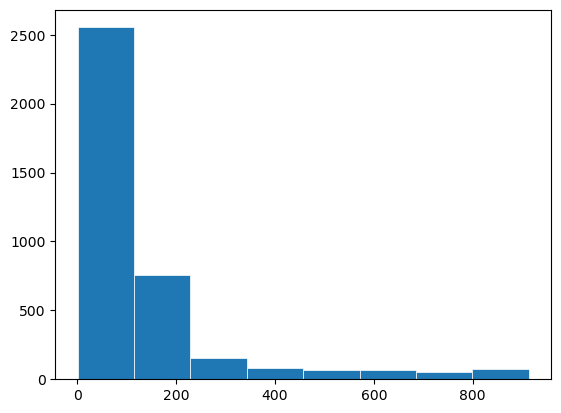

In [28]:
#Histograma student
x = df.student
fig, ax = plt.subplots()
ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x199aa8953d0>,
 'caps': [<matplotlib.lines.Line2D at 0x199aa895970>,
 'boxes': [<matplotlib.lines.Line2D at 0x199aa895100>],
 'medians': [<matplotlib.lines.Line2D at 0x199aa895f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x199aa8a2220>],
 'means': []}

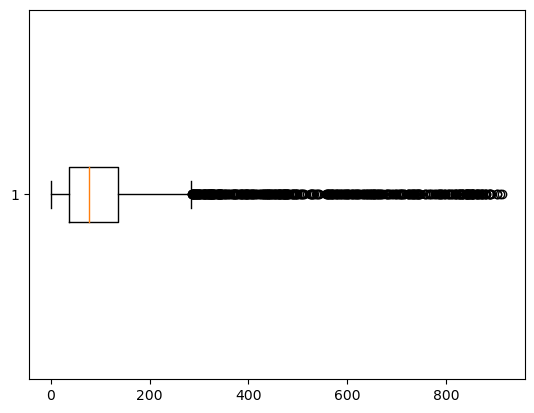

In [29]:
# Boxplot student
plt.boxplot(df['student'], vert = False)

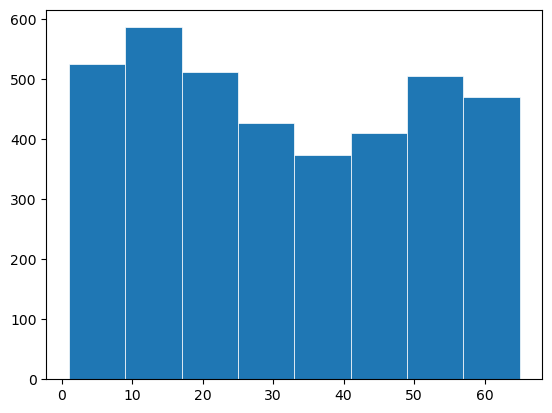

In [30]:
#Histograma school
x = df.school
fig, ax = plt.subplots()
ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x199aa971b50>,
 'caps': [<matplotlib.lines.Line2D at 0x199aa982130>,
 'boxes': [<matplotlib.lines.Line2D at 0x199aa971880>],
 'medians': [<matplotlib.lines.Line2D at 0x199aa9826d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x199aa9829a0>],
 'means': []}

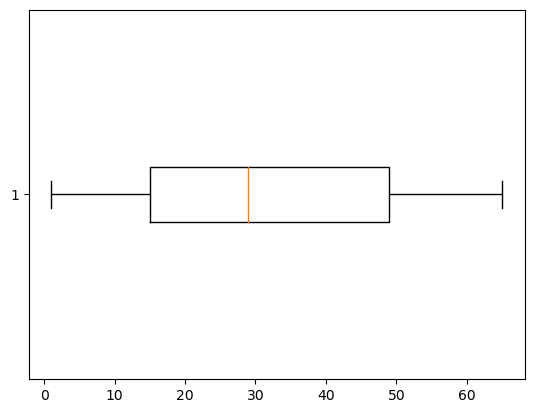

In [31]:
# Boxplot school
plt.boxplot(df['school'], vert = False)

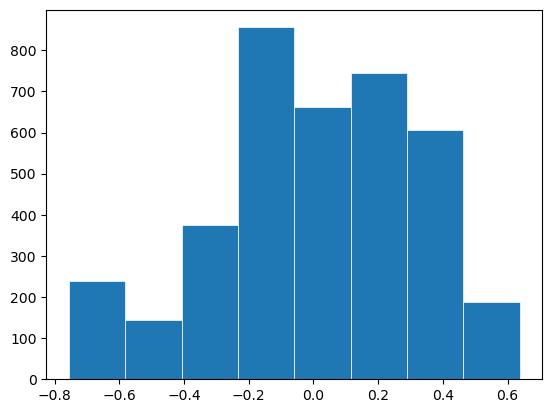

In [32]:
#Histograma schavg
x = df.schavg
fig, ax = plt.subplots()
ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x199aaa9a940>,
 'caps': [<matplotlib.lines.Line2D at 0x199aaa9aee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x199aaa9a670>],
 'medians': [<matplotlib.lines.Line2D at 0x199aaaaa4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x199aaaaa790>],
 'means': []}

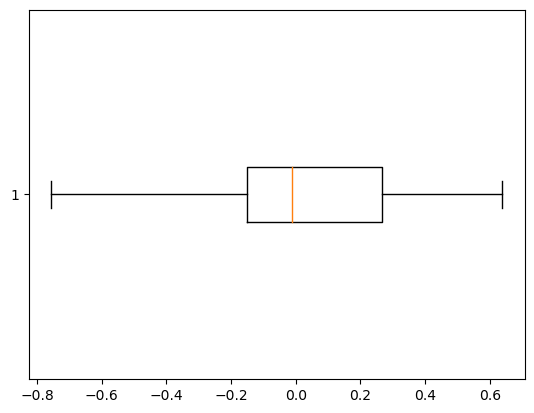

In [33]:
# Boxplot schavg
plt.boxplot(df['schavg'], vert = False)

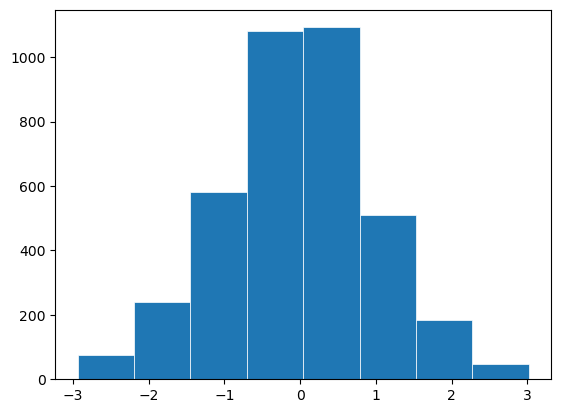

In [34]:
#Histograma standLRT
x = df.standLRT
fig, ax = plt.subplots()
ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x199aaba3af0>,
 'caps': [<matplotlib.lines.Line2D at 0x199aabb40d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x199aaba3820>],
 'medians': [<matplotlib.lines.Line2D at 0x199aabb4670>],
 'fliers': [<matplotlib.lines.Line2D at 0x199aabb4940>],
 'means': []}

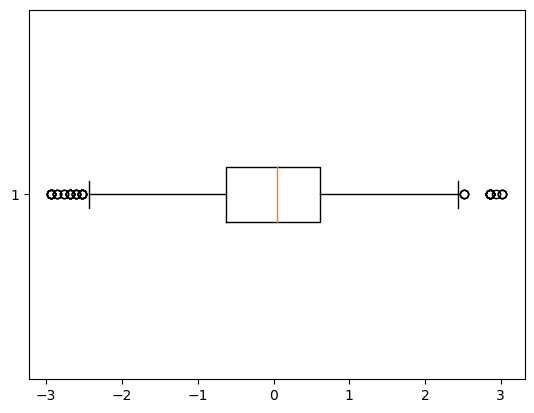

In [35]:
# Boxplot standLRT
plt.boxplot(df['standLRT'], vert = False)

In [36]:
# Utilizando get_dummies
# Com o intuito de considerar as colunas objetos, a transformação para número ocorre via get_dummies

df = pd.concat([df, pd.get_dummies(df['intake'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['sex'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['VR'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['schgend'])], axis=1)
df

,school,student,intake,sex,VR,schgend,schavg,standLRT,Normexam,bottom 25%,mid 50%,top 25%,F,M,bottom 25%,mid 50%,top 25%,boys,girls,mixed
0,1,145,mid 50%,F,mid 50%,mixed,0.166175,0.205802,0.134067,0,1,0,1,0,0,1,0,0,0,1
1,1,142,top 25%,M,mid 50%,mixed,0.166175,-1.364576,-1.723882,0,0,1,0,1,0,1,0,0,0,1
2,1,141,mid 50%,F,mid 50%,mixed,0.166175,0.205802,0.967586,0,1,0,1,0,0,1,0,0,0,1
3,1,138,mid 50%,F,mid 50%,mixed,0.166175,0.371105,0.544341,0,1,0,1,0,0,1,0,0,0,1
4,1,155,bottom 25%,M,mid 50%,mixed,0.166175,2.189437,1.734899,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,65,44,top 25%,F,mid 50%,girls,-0.235350,-1.281924,-1.118624,0,0,1,1,0,0,1,0,0,1,0
3916,65,45,top 25%,F,mid 50%,girls,-0.235350,-1.529879,-1.623730,0,0,1,1,0,0,1,0,0,1,0
3919,65,60,mid 50%,F,mid 50%,girls,-0.235350,0.453756,0.004322,0,1,0,1,0,0,1,0,0,1,0
3920,65,61,mid 50%,F,mid 50%,girls,-0.235350,-0.786016,0.004322,0,1,0,1,0,0,1,0,0,1,0


In [37]:
# Verificando colunas tipo objeto
df.dtypes

school          int64
student         int64
intake         object
sex            object
VR             object
schgend        object
schavg        float64
standLRT      float64
Normexam      float64
bottom 25%      uint8
mid 50%         uint8
top 25%         uint8
F               uint8
M               uint8
bottom 25%      uint8
mid 50%         uint8
top 25%         uint8
boys            uint8
girls           uint8
mixed           uint8
dtype: object

In [38]:
# Eliminado colunas tipo obejo
df = df.drop(['intake', 'sex', 'VR', 'schgend' ], axis=1)


In [39]:
df

,school,student,schavg,standLRT,Normexam,bottom 25%,mid 50%,top 25%,F,M,bottom 25%,mid 50%,top 25%,boys,girls,mixed
0,1,145,0.166175,0.205802,0.134067,0,1,0,1,0,0,1,0,0,0,1
1,1,142,0.166175,-1.364576,-1.723882,0,0,1,0,1,0,1,0,0,0,1
2,1,141,0.166175,0.205802,0.967586,0,1,0,1,0,0,1,0,0,0,1
3,1,138,0.166175,0.371105,0.544341,0,1,0,1,0,0,1,0,0,0,1
4,1,155,0.166175,2.189437,1.734899,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,65,44,-0.235350,-1.281924,-1.118624,0,0,1,1,0,0,1,0,0,1,0
3916,65,45,-0.235350,-1.529879,-1.623730,0,0,1,1,0,0,1,0,0,1,0
3919,65,60,-0.235350,0.453756,0.004322,0,1,0,1,0,0,1,0,0,1,0
3920,65,61,-0.235350,-0.786016,0.004322,0,1,0,1,0,0,1,0,0,1,0


### 3.2 Correlação 

In [40]:
df.corr()

,school,student,schavg,standLRT,Normexam,bottom 25%,mid 50%,top 25%,F,M,bottom 25%,mid 50%,top 25%,boys,girls,mixed
school,1.000000,0.011329,-0.201412,-0.069494,-0.052357,-0.059682,0.003996,0.072167,-0.115310,0.115310,0.005809,0.212479,-0.237720,0.219688,-0.063773,-0.092695
student,0.011329,1.000000,-0.122202,-0.033253,-0.032452,-0.042064,0.036881,0.002246,0.026749,-0.026749,-0.126005,0.202832,-0.122246,0.081571,0.029791,-0.084771
schavg,-0.201412,-0.122202,1.000000,0.302912,0.269141,0.192496,-0.069258,-0.152315,0.022884,-0.022884,-0.709564,-0.158253,0.738247,0.021676,0.006012,-0.020733
standLRT,-0.069494,-0.033253,0.302912,1.000000,0.588816,0.589953,-0.174109,-0.521255,0.042594,-0.042594,-0.218948,-0.046908,0.225689,-0.001591,0.006411,-0.004931
Normexam,-0.052357,-0.032452,0.269141,0.588816,1.000000,0.470440,-0.161715,-0.383009,0.096412,-0.096412,-0.166872,-0.069880,0.209450,0.007780,0.104797,-0.104097
bottom 25%,-0.059682,-0.042064,0.192496,0.589953,0.470440,1.000000,-0.735523,-0.255008,0.005991,-0.005991,-0.119526,-0.038548,0.137401,0.041970,-0.008158,-0.021500
mid 50%,0.003996,0.036881,-0.069258,-0.174109,-0.161715,-0.735523,1.000000,-0.467537,0.043792,-0.043792,0.015707,0.037017,-0.053108,-0.089583,0.037013,0.027433
top 25%,0.072167,0.002246,-0.152315,-0.521255,-0.383009,-0.255008,-0.467537,1.000000,-0.070317,0.070317,0.133535,-0.002536,-0.103479,0.073094,-0.042181,-0.011100
F,-0.115310,0.026749,0.022884,0.042594,0.096412,0.005991,0.043792,-0.070317,1.000000,-1.000000,-0.041989,-0.045476,0.083302,-0.483695,0.584530,-0.214137
M,0.115310,-0.026749,-0.022884,-0.042594,-0.096412,-0.005991,-0.043792,0.070317,-1.000000,1.000000,0.041989,0.045476,-0.083302,0.483695,-0.584530,0.214137


## 4 - Modelo

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # importando modelo de treino e teste
from sklearn.metrics import r2_score                 # Importando métrica de avaliação Coeficiente de determinação R² 
from mpl_toolkits.mplot3d import axes3d
X = df[[ 'boys', 'girls']].values                    # Variáveis de entrada
#X = df[[ 'boys', 'girls', 'standLRT']].values       # Variáveis de entrada considerando uma quarta vaiavel
y = df['Normexam'].values                            # Alvo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) # Separando em treino e teste

reg = LinearRegression().fit(X_train, y_train)      # Fit
a_coef = reg.coef_                                  # calculando os coeficientes angulares
l_coef = reg.intercept_                             # calculando os coeficiente linear
pred = reg.predict(X_test)                          # Predição
r2_score(y_test, pred)                              # Calculando o coeficiente de determinação

0.010471544684445

In [42]:
print(f'Coeficiente Angular: {a_coef}\nCoeficiente Linear: {l_coef}')

Coeficiente Angular: [0.11162725 0.25816465]
Coeficiente Linear: -0.10715481874180874


## 5 - Conclusão

Após a organização, pré-processamento e análise exploratória a técnica que proporciona responder qual escola (gênero misto, só de homens ou só de mulheres) é mais eficiente na formação de seus alunos de acordo com o resultado do exame normalizado é Regressão Linear Multipla. Utilizando apenas as variáveis 'mixed', 'girls' e' 'boys', que representam os gêneros das escolas é possível determinar qual é mais eficiente, visto que o modelo retorna os seguintes parâmetros y = -0,088 + 0,1304*X(1) + 0,2158X(2). Onde, o parâmetro 0,2158 representa a mais eficiente, as quais são escolas formadas apenas por meninas, o parâmetro 0,1304 a segunda mais eficiente são escolas formadas apenas por meninos e -0,0888 são escolas mistas consideradas a menos eficiente. Porém, para apenas essas três variáveis o coeficiente de determinação do modelo é baixo com um R² = 0,0197, ou seja, o modelo considerando apenas as três variáveis de gênero não explica os dados. Todavia, quando considerado uma quarta variável no modelo, variável essa 'standLRT', que possui uma melhor correlação com o alvo, o coeficiente de determinação apresenta um resultado de R² = 0,3866, uma melhora significativa na explicabilidade. Assim, a equação de parâmetros passas a ser y = -0,1186 + 0,1159*X(1) + 0,2385*X(2) + 0.5889*X(3). Contudo o ranking de eficiência se mantem. 
 
